# Anomaly Detection Notebook

## 1. Import Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

## 2. Loading Data

In [19]:
data = pd.read_csv('../data/Transactions/transactions_1.csv')

print(data.head())

     time    status  f0_
0  00h 00  approved    9
1  00h 00    denied    6
2  00h 00  refunded    1
3  00h 01    denied    8
4  00h 01  approved   13


## 3. Data Preprocessing

In [20]:
# Convert the 'time' column to datetime format
data['time'] = pd.to_datetime(data['time'], format='%Hh %M')

# Create a numeric column for status
data['status_num'] = data['status'].astype('category').cat.codes

In [23]:
data

,time,status,f0_,status_num
0,1900-01-01 00:00:00,approved,9,0
1,1900-01-01 00:00:00,denied,6,2
2,1900-01-01 00:00:00,refunded,1,5
3,1900-01-01 00:01:00,denied,8,2
4,1900-01-01 00:01:00,approved,13,0
...,...,...,...,...
4229,1900-01-01 23:59:00,processing,4,4
4230,1900-01-01 23:59:00,denied,1,2
4231,1900-01-01 23:59:00,backend_reversed,5,1
4232,1900-01-01 23:59:00,approved,10,0


## 4. Data Visualization

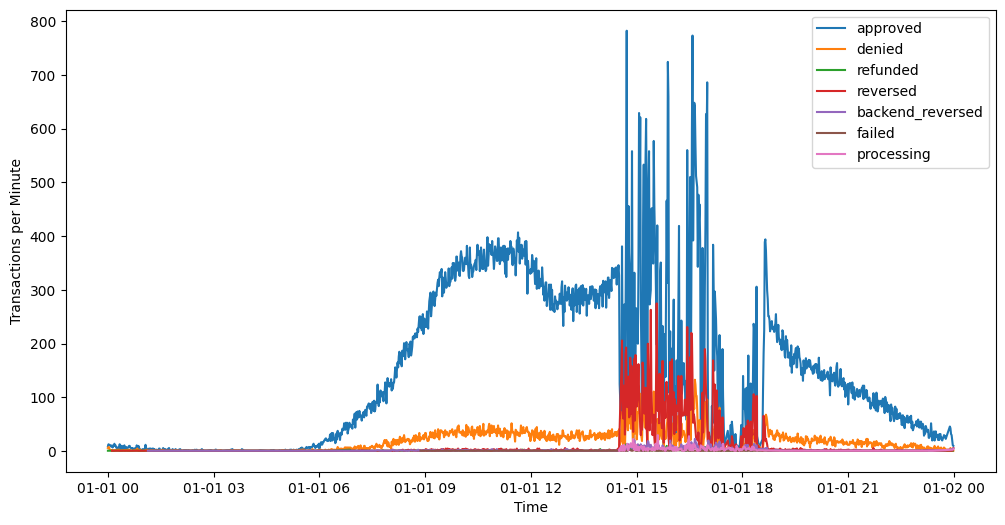

In [21]:
# View transaction graph per minute for each status
plt.figure(figsize=(12, 6))
for status in data['status'].unique():
    plt.plot(data[data['status'] == status]['time'], data[data['status'] == status]['f0_'], label=status)

plt.xlabel('Time')
plt.ylabel('Transactions per Minute')
plt.legend()
plt.show()

## 5. Building the Anomaly Detection Model

In [64]:
# Select relevant features
features = ['status_num', 'f0_']

# Train the Isolation Forest model
model = IsolationForest(contamination=0.025) # Adjust as needed
model.fit(data[features])


C:\Users\Pedro Natanael\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.025)

In [65]:
data['anomaly_scores'] = model.decision_function(data[features])

In [66]:
data['anomaly'] = model.predict(data[features])

In [67]:
data[data['anomaly'] == -1].groupby("status")['f0_'].agg("count").reset_index()

,status,f0_
0,approved,41
1,denied,4
2,reversed,59


## 6. View Anomalies

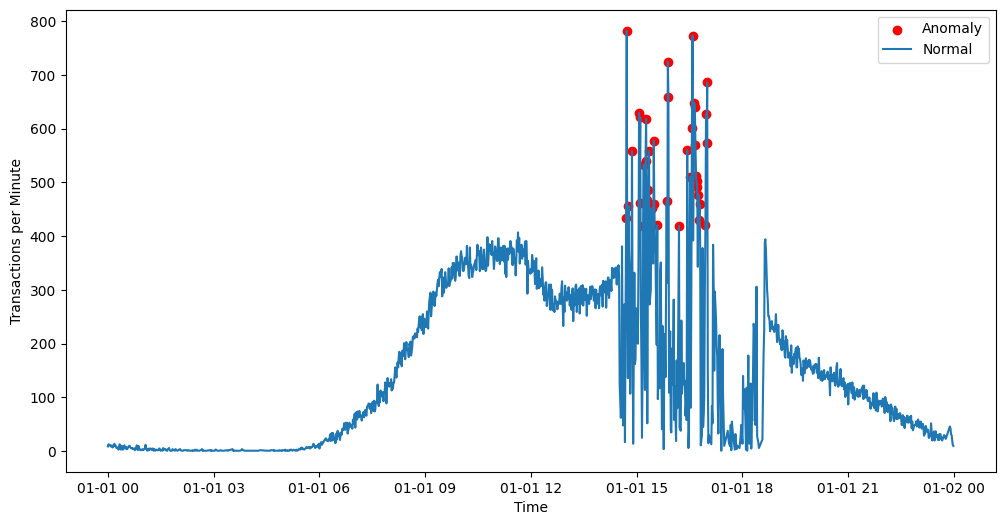

In [68]:
# View anomalies in approved transactions
plt.figure(figsize=(12, 6))
plt.scatter(data[(data['anomaly'] == -1) & (data['status'] == 'approved')]['time'], data[(data['anomaly'] == -1) & (data['status'] == 'approved')]['f0_'], color='red', label= 'Anomaly')
plt.plot(data[data['status'] == 'approved']['time'], data[data['status'] == 'approved']['f0_'], label='Normal')

plt.xlabel('Time')
plt.ylabel('Transactions per Minute')
plt.legend()
plt.show()

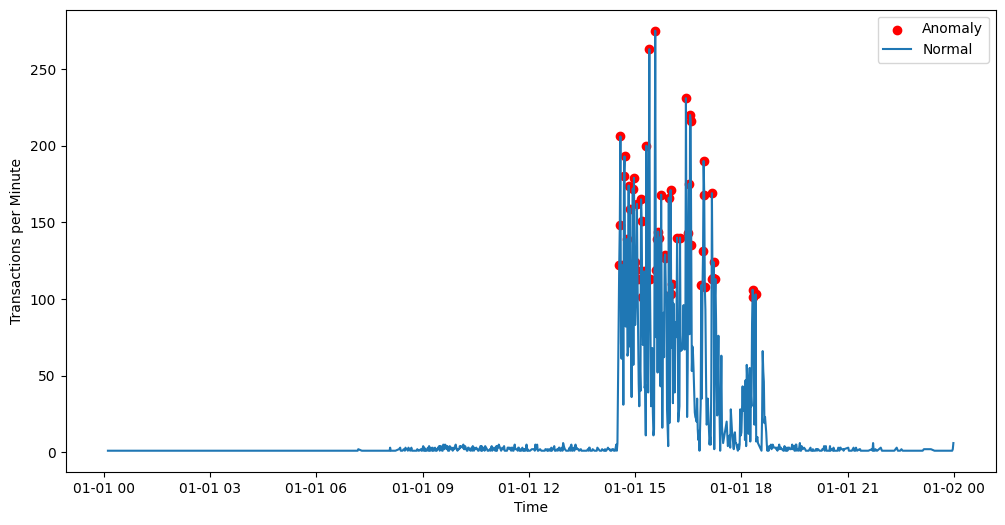

In [69]:
# View anomalies in reversed transactions
plt.figure(figsize=(12, 6))
plt.scatter(data[(data['anomaly'] == -1) & (data['status'] == 'reversed')]['time'], data[(data['anomaly'] == -1) & (data['status'] == 'reversed')]['f0_'], color='red', label= 'Anomaly')
plt.plot(data[data['status'] == 'reversed']['time'], data[data['status'] == 'reversed']['f0_'], label='Normal')

plt.xlabel('Time')
plt.ylabel('Transactions per Minute')
plt.legend()
plt.show()

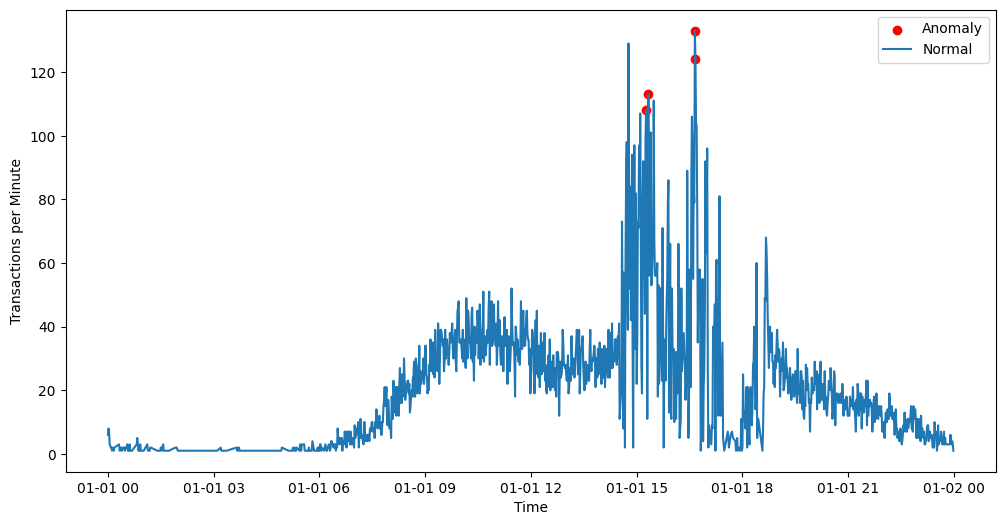

In [70]:
# View anomalies in denied transactions
plt.figure(figsize=(12, 6))
plt.scatter(data[(data['anomaly'] == -1) & (data['status'] == 'denied')]['time'], data[(data['anomaly'] == -1) & (data['status'] == 'denied')]['f0_'], color='red', label= 'Anomaly')
plt.plot(data[data['status'] == 'denied']['time'], data[data['status'] == 'denied']['f0_'], label='Normal')

plt.xlabel('Time')
plt.ylabel('Transactions per Minute')
plt.legend()
plt.show()

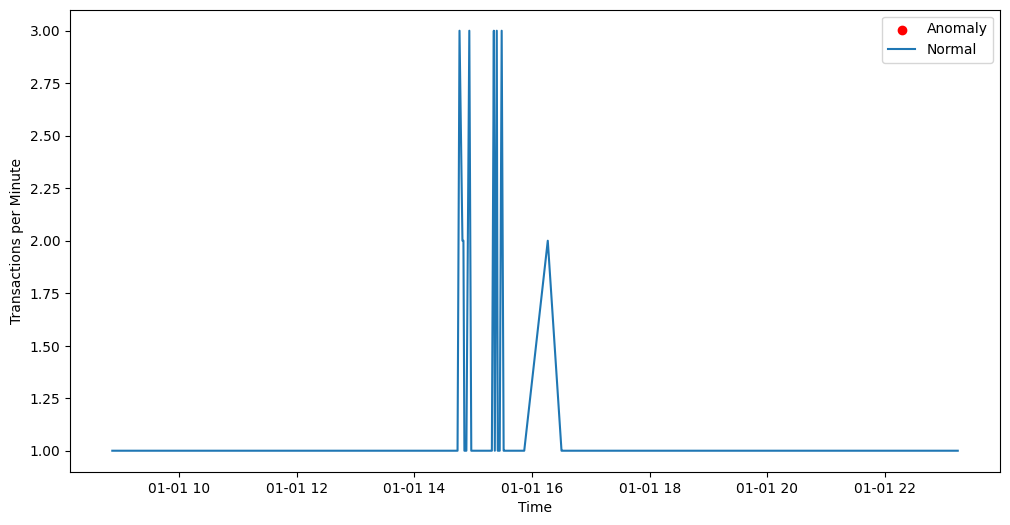

In [71]:
# View anomalies in failed transactions
plt.figure(figsize=(12, 6))
plt.scatter(data[(data['anomaly'] == -1) & (data['status'] == 'failed')]['time'], data[(data['anomaly'] == -1) & (data['status'] == 'failed')]['f0_'], color='red', label= 'Anomaly')
plt.plot(data[data['status'] == 'failed']['time'], data[data['status'] == 'failed']['f0_'], label='Normal')

plt.xlabel('Time')
plt.ylabel('Transactions per Minute')
plt.legend()
plt.show()